## Business Understanding
For this project, I was interestested in using Stack Overflow data from 2017 to better understand:

- What are the most common languages used by professionals?
- What is the average salary for each programming language?
- Which programming language has the highest job satisfaction?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data Understanding
First, we provide a general view to our data by loading the dataset into a dataframe. 

In [2]:
#read the data
pd.set_option('display.max_columns', None)
df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

## Question 1: What are the most common languages used by professionals

# Prepare Data
Data is prepared by selecting only the 'Professional Developer' of Professional column and programming languages from 'HaveWorkedLanguage' column.

The following code lists Professional Developer who have done extensive development work in particular programming languages.


In [3]:
comm_lang = df[['Professional', 'HaveWorkedLanguage']]
comm_lang = comm_lang[comm_lang.Professional == "Professional developer"]
comm_lang.head()

,Professional,HaveWorkedLanguage
2,Professional developer,Java; PHP; Python
4,Professional developer,NaN
7,Professional developer,CoffeeScript; Clojure; Elixir; Erlang; Haskell...
8,Professional developer,C#; JavaScript
9,Professional developer,Objective-C; Swift


# Data Modelling

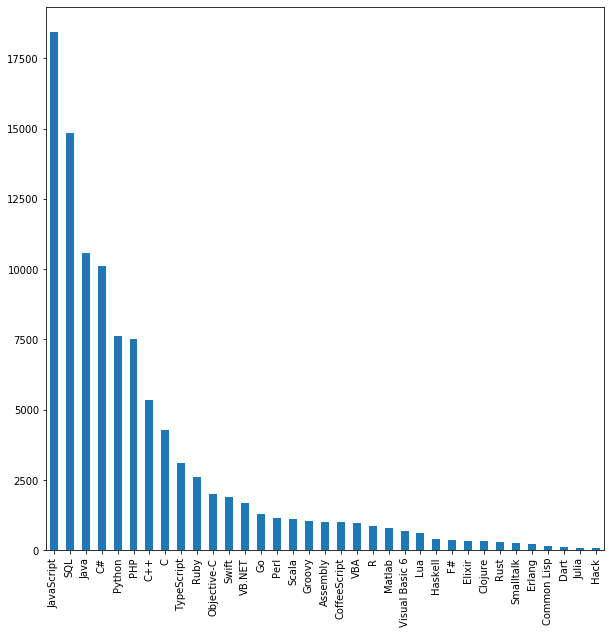

In [4]:
#Provide a pandas series of the counts for each Programming language
languages = comm_lang['HaveWorkedLanguage'].str.split('; ', expand=True).stack().value_counts()
plt.figure(figsize=(10,10))
languages.plot(kind="bar")
#plt.savefig('languages')

# Results

JavaScript and SQL are the highly used and on demand languages.

## Question 2:  What is the average salary for each programming language

# Prepare Data
The below data is prepared by choosing these columns i.e, ('Professional', 'HaveWorkedLanguage', 'Salary')  from the raw dataset and using the rows where the professional column value is professional developer. As am interested in finding the relation between 'HaveWorkedLanguage' and 'Salary' columns so dropping the rows having Nan values for those two columns.By this way I can handle  Nan and categorical values.

In [5]:
sal_df = df[['Professional', 'HaveWorkedLanguage', 'Salary']]

sal_df = sal_df[sal_df.Professional == "Professional developer"]
sal_df = sal_df.drop('Professional', 1)
sal_df = sal_df.dropna(subset=['Salary', 'HaveWorkedLanguage'], axis=0)
sal_df.head()

,HaveWorkedLanguage,Salary
2,Java; PHP; Python,113750.0
14,Assembly; C; C++,100000.0
17,C; Clojure; JavaScript; Matlab; Rust; SQL; Swift,130000.0
22,Java,100764.0
25,Java; Scala,175000.0


# Data Modelling

In [6]:
def split(col_split, delimeter, col_store, df):
    """
    Return a new dataframe by spliting a columns values by a provided delimeter while
    retaining the associated value of another column.
    
    Parameters:
    col_split: column whose values are to be split
    delimeter: delimeter to split by
    col_store: column who's data must be stored along split rows
    df: a raw data dataframe
    
    Returns:
    split_col: a new dataframe with a desired columns

    """
    col = pd.DataFrame(columns = [col_split, col_store])
    for index, row in df.iterrows():
        columns = row[col_split].split(delimeter)
        for c in columns:
            col.loc[len(col)] = [c, row[col_store]]
            
    return col

In [7]:
sp_languages = split("HaveWorkedLanguage", "; ", "Salary", sal_df)

sp_languages.head()

,HaveWorkedLanguage,Salary
0,Java,113750.0
1,PHP,113750.0
2,Python,113750.0
3,Assembly,100000.0
4,C,100000.0


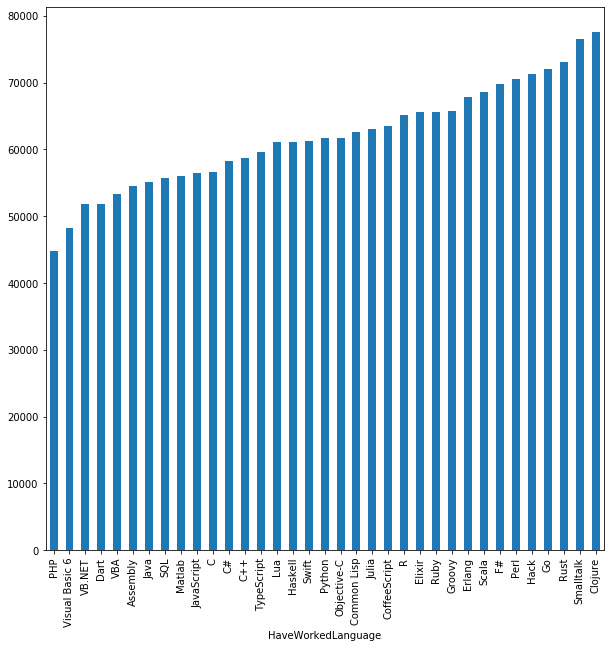

In [8]:
avg_sal = sp_languages.groupby(['HaveWorkedLanguage']).mean()['Salary'].sort_values()
plt.figure(figsize=(10,10))
avg_sal.plot(kind = 'bar')
#plt.savefig('Avg Salary')

# Results
The graph depicts the average salary for each language during 2017 stack overflow survey. All the languages were highly used in the software industry and more than 60k was paid as a total compensation.

## Question 3: Which programming language has the highest job satisfaction

# Prepare Data
The below data is prepared by choosing these columns i.e, ('Professional', 'HaveWorkedLanguage', 'JobSatisfaction') from the raw dataset and using the rows where the professional column value is professional developer. As am interested in finding the relation between 'HaveWorkedLanguage' and 'JobSatisfaction' columns so dropping the rows having Nan values for those two columns.By this way I can handle Nan and categorical values.

In [9]:
job_df = df[['Professional', 'HaveWorkedLanguage', 'JobSatisfaction']]

job_df = job_df[job_df.Professional == "Professional developer"]
job_df = job_df.drop('Professional', 1)
job_df = job_df.dropna(subset=['JobSatisfaction', 'HaveWorkedLanguage'], axis=0)
job_df.head()

,HaveWorkedLanguage,JobSatisfaction
2,Java; PHP; Python,9.0
7,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,7.0
8,C#; JavaScript,6.0
9,Objective-C; Swift,8.0
13,Java; JavaScript; Ruby; SQL,6.0


# Data Modelling

In [10]:
sp_languages_df = split("HaveWorkedLanguage", "; ", "JobSatisfaction", job_df)

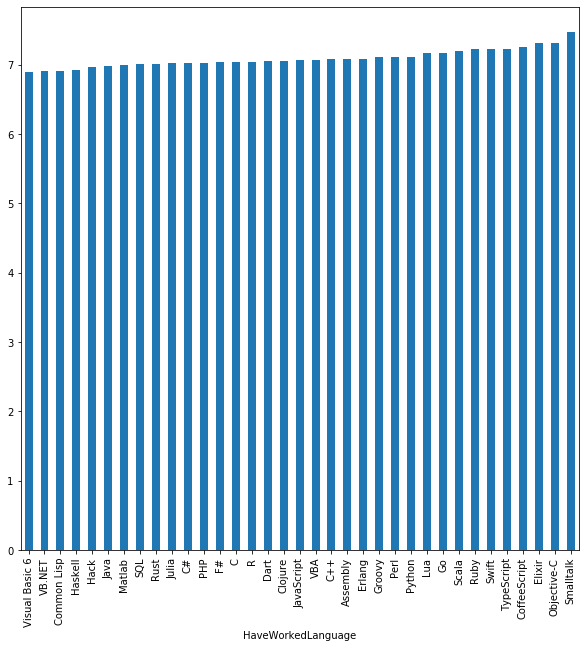

In [11]:
job_satfac = sp_languages_df.groupby(['HaveWorkedLanguage']).mean()['JobSatisfaction'].sort_values()
plt.figure(figsize=(10,10))
job_satfac.plot(kind = 'bar')

# Results
All the languages has high demand in the software industry and is highly paid.Additionally, JavaScript is the most popular language but Clojure is highly paid. Where as Smalltalk is highly rated by most professional developers according to 2017 stackoverflow survey